# Importing libraries

In [42]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.datasets as dsets
from torchvision import transforms
import matplotlib.pyplot as plt
import tqdm

# Device configuration

In [43]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

# Loading Dataset

In [44]:
# Load MNIST dataset
train_dataset = dsets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = dsets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)

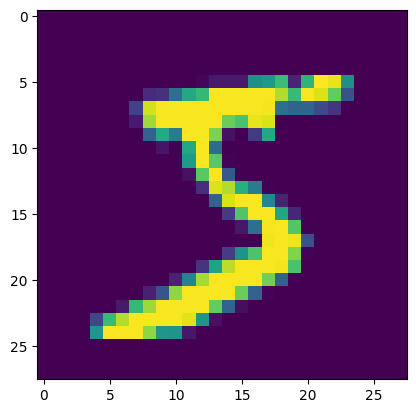

In [45]:
# Plot the first image in the training dataset
plt.imshow(train_dataset.data[0])

# Create Data Loaders for the Train and Test Datasets

In [46]:
#Define batch size
batch_size = 32

# Data Loader
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Hyperparameters

In [47]:
# Insantiating Hyperparameters
input_size = 784
num_classes = 10
learning_rate = 0.001
EPOCH = 10

# Logistic Regression Model

In [55]:
hidden_layer1 = 256
hidden_layer2 = 64

model = nn.Sequential(
    nn.Linear(input_size, hidden_layer1),
    nn.ReLU(),
    nn.Linear(hidden_layer1, hidden_layer2),
    nn.ReLU(),
    nn.Linear(hidden_layer2, num_classes),
    nn.LogSoftmax(dim=1)
)

# Loss and optimizer

In [56]:
loss = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training and Testing the model

In [57]:
# Creating lists to keep track of loss and accuracy
train_loss = []
train_accuracy = []
test_loss = []
test_accuracy = []

def train():
    #Train the model
    train_count = 0
    train_correct = 0
    total_train_loss = 0

    for images, labels in tqdm.tqdm(train_loader, desc="Training"):
        bs = images.size(0)
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)

        # Calculate loss
        cost = loss(outputs, labels)
        total_train_loss += cost.item()

        # Backward and optimize
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        # Track train accuracy
        _, predicted = torch.max(outputs.data, 1)
        train_count += bs
        train_correct += (predicted == labels).sum().item()

    cur_loss = total_train_loss/len(train_loader)
    train_accuracy.append(train_correct/train_count)
    train_loss.append(cur_loss)

    print( f"Loss = {cur_loss:.4f}, Train Accuracy = {train_accuracy[-1]*100}")

def test():
    # Test the model
    test_count = 0
    test_correct = 0
    total_test_loss = 0

    model.eval()
    for images, labels in tqdm.tqdm(test_loader, desc="Testing"):
        bs = images.size(0)
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)

        # Calculate loss
        cost = loss(outputs, labels)
        total_test_loss += cost.item()

        # Track test accuracy
        _, predicted = torch.max(outputs.data, 1)
        test_count += bs
        test_correct += (predicted == labels).sum().item()

    test_accuracy.append(test_correct/test_count)
    cur_loss = total_test_loss/len(test_loader)
    test_loss.append(cur_loss)

    print(f"Loss = {cur_loss}, Test Accuracy = {test_accuracy[-1]*100}")

for epoch in range(EPOCH):
    print(f"Epoch {epoch+1} of {EPOCH}")
    train()
    test()



Epoch 1 of 10


Training: 100%|██████████| 1875/1875 [00:07<00:00, 255.97it/s]


Loss = 0.2575, Train Accuracy = 92.42


Testing: 100%|██████████| 313/313 [00:00<00:00, 450.29it/s]


Loss = 0.11368120604264624, Test Accuracy = 96.36
Epoch 2 of 10


Training: 100%|██████████| 1875/1875 [00:07<00:00, 262.33it/s]


Loss = 0.1007, Train Accuracy = 96.89833333333333


Testing: 100%|██████████| 313/313 [00:00<00:00, 432.95it/s]


Loss = 0.0848535179788081, Test Accuracy = 97.35000000000001
Epoch 3 of 10


Training: 100%|██████████| 1875/1875 [00:07<00:00, 261.60it/s]


Loss = 0.0679, Train Accuracy = 97.895


Testing: 100%|██████████| 313/313 [00:00<00:00, 450.34it/s]


Loss = 0.08089853891239579, Test Accuracy = 97.45
Epoch 4 of 10


Training: 100%|██████████| 1875/1875 [00:07<00:00, 260.48it/s]


Loss = 0.0507, Train Accuracy = 98.34


Testing: 100%|██████████| 313/313 [00:00<00:00, 447.22it/s]


Loss = 0.08017046044870584, Test Accuracy = 97.6
Epoch 5 of 10


Training: 100%|██████████| 1875/1875 [00:07<00:00, 262.61it/s]


Loss = 0.0392, Train Accuracy = 98.685


Testing: 100%|██████████| 313/313 [00:00<00:00, 450.98it/s]


Loss = 0.08926172943707866, Test Accuracy = 97.31
Epoch 6 of 10


Training: 100%|██████████| 1875/1875 [00:07<00:00, 239.55it/s]


Loss = 0.0302, Train Accuracy = 99.01666666666667


Testing: 100%|██████████| 313/313 [00:01<00:00, 297.05it/s]


Loss = 0.07648474333858724, Test Accuracy = 97.76
Epoch 7 of 10


Training: 100%|██████████| 1875/1875 [00:07<00:00, 263.49it/s]


Loss = 0.0242, Train Accuracy = 99.20666666666666


Testing: 100%|██████████| 313/313 [00:01<00:00, 311.52it/s]


Loss = 0.08270807377441898, Test Accuracy = 97.85000000000001
Epoch 8 of 10


Training: 100%|██████████| 1875/1875 [00:07<00:00, 250.29it/s]


Loss = 0.0215, Train Accuracy = 99.26833333333333


Testing: 100%|██████████| 313/313 [00:00<00:00, 451.13it/s]


Loss = 0.08774825424883655, Test Accuracy = 97.75
Epoch 9 of 10


Training: 100%|██████████| 1875/1875 [00:07<00:00, 263.18it/s]


Loss = 0.0178, Train Accuracy = 99.41499999999999


Testing: 100%|██████████| 313/313 [00:00<00:00, 450.97it/s]


Loss = 0.08309387142234476, Test Accuracy = 97.91
Epoch 10 of 10


Training: 100%|██████████| 1875/1875 [00:07<00:00, 263.70it/s]


Loss = 0.0168, Train Accuracy = 99.48333333333333


Testing: 100%|██████████| 313/313 [00:00<00:00, 427.04it/s]

Loss = 0.10237756109507862, Test Accuracy = 97.78


# Plotting Loss and Accuracy

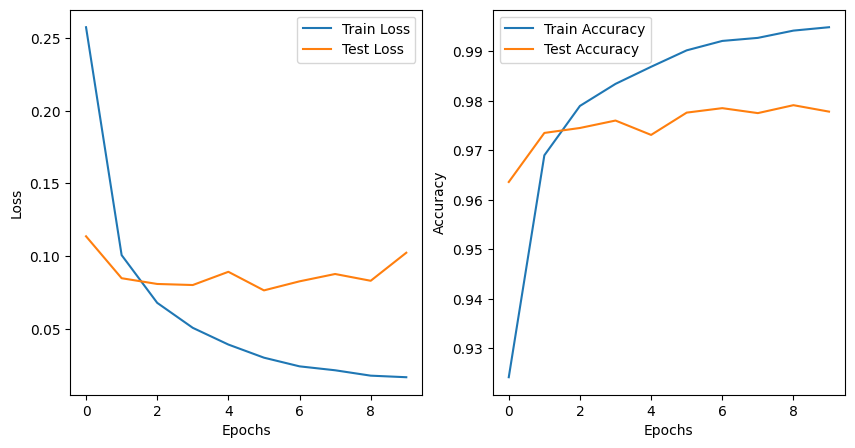

In [58]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the First 16 Images with their Predictions

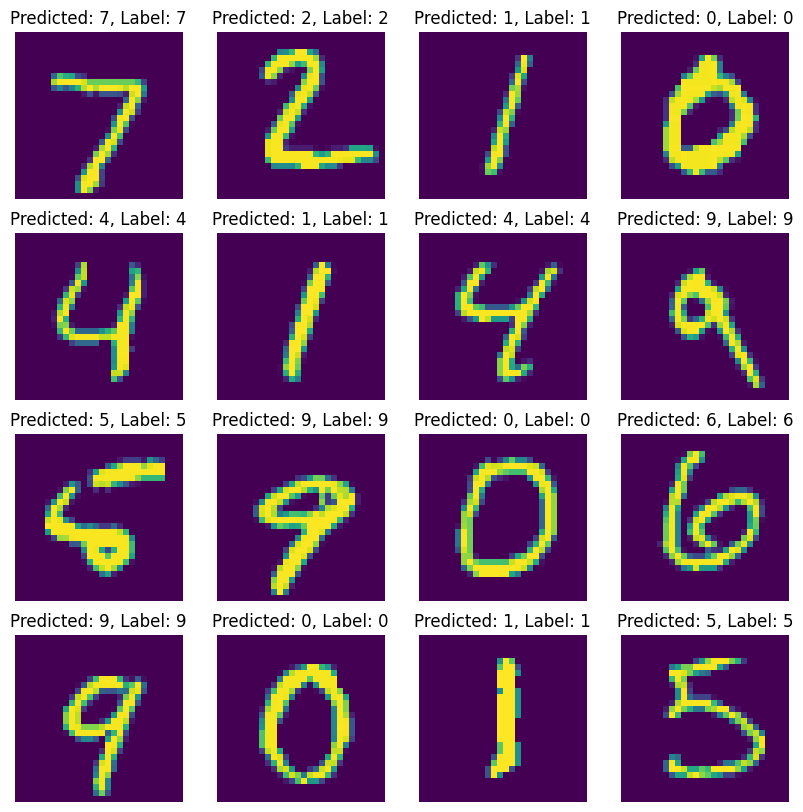

In [59]:
plt.figure(figsize=(10, 10))

model.eval()
with torch.no_grad():
    for i in range(16):
        plt.subplot(4, 4, i+1)
        image, label = test_dataset[i]
        image = image.reshape(-1, 28*28).to(device)
        output = model(image)
        _, predicted = torch.max(output.data, 1)
        plt.imshow(image.cpu().reshape(28, 28))
        plt.title(f'Predicted: {predicted.item()}, Label: {label}')
        plt.axis('off')
plt.show()